# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Hanif Anandaputri
- **Email:** hanifanandaputri27@gmail.com
- **ID Dicoding:** hanif_anandaputri

## Menentukan Pertanyaan Bisnis

- Bagaimana variasi pola penggunaan sepeda berdasarkan musim tahun 2011-2012?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

## Data Wrangling

### Gathering Data

In [12]:
# Loading Data
day_df = pd.read_csv(r'D:\Bangkit\Analisis Data\Data\day.csv')
hour_df = pd.read_csv(r'D:\Bangkit\Analisis Data\Data\hour.csv')

Dataset yang akan digunakan adalah -> day.csv

In [13]:
# Tampilkan beberapa baris awal dari dataset
print("Preview Data:")
display(day_df.head(10))

Preview Data:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


insight:

1. temp (suhu) dan atemp (suhu yang dirasakan) menunjukkan suhu yang relatif rendah, sesuai dengan musim dingin. Misalnya, suhu berkisar sekitar 0.34 hingga 0.36 pada skala normalisasi.
2. Terdapat 15 Feature dan 731 Baris


### Assessing Data

In [14]:
# Cek nilai yang hilang
print("Nilai yang Hilang:")
print(day_df.isnull().sum())

Nilai yang Hilang:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


tidak ada data yang kosong, sehingga tidak perlu dilakukan penanganan missing value

In [15]:
# statistik deskriptif feature
print("Statistik Deskriptif Feature:")
display(day_df.describe())


Statistik Deskriptif Feature:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
# Tampilkan type data setiap kolom / feauture
print("TIpe Data Setiap Feature:")
print(day_df.info())

TIpe Data Setiap Feature:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


insight:

Dataset ini terdiri dari 16 kolom yang mencakup berbagai atribut, baik yang bersifat numerik (integer dan float) maupun kategori (object).

### Cleaning Data

Perhatikan bahwa, dari informasi day_df diatas, perlu dilakukan hal sebagai berikut untuk memudahkan analisis:
1. kolom dteday masih dalam object akan dibuat jadi tipe data datetime
2. kolom instant menjadi index dari dataframe.
3. wheatersit masih dalam bentuk angka yaitu:
weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Sehingga, pada wheatersit akan dilakukan pemetaan menjadi object dalam bahasa indonesia yang cocok sesuai deskripsi wheatersit untuk wheatersit 1,2,3,dan 4
4. season masih dalam data numerik, sehingga akan dilakukan pemetaan dengan ketentuan 1:springer, 2:summer, 3:fall, 4:winter.

In [10]:
# Copy dataset untuk menjada orisinalitas data
clean_df = day_df.copy()

# Mengubah kolom 'dteday' menjadi tipe datetime
clean_df['dteday'] = pd.to_datetime(clean_df['dteday'])

# Menjadikan kolom 'instant' sebagai index dataframe
clean_df = clean_df.set_index('instant')


# Mengubah 'weathersit' menjadi object dengan deskripsi dalam bahasa Indonesia
weather_mapping = {
    1: 'Cerah, Berawan Sedikit',
    2: 'Berkabut + Mendung',
    3: 'Salju Ringan, Hujan Ringan + Petir',
    4: 'Hujan Lebat + Badai, Salju + Kabut'
}
clean_df['weathersit'] = clean_df['weathersit'].map(weather_mapping).astype('object')

# Mengubah 'season' menjadi object dengan nama musim dalam bahasa Indonesia
season_mapping = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}
clean_df['season'] = clean_df['season'].map(season_mapping).astype('object')

Data suda bersih dan siap untuk dilakukan analisis

## Exploratory Data Analysis (EDA)

In [17]:
# Cek informasi variabel dataframe yang baru
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8), object(2)
memory usage: 91.4+ KB


In [61]:
display(clean_df.head())

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,Musim Semi,0,1,0,6,0,Berkabut + Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,Musim Semi,0,1,0,0,0,Berkabut + Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,Musim Semi,0,1,0,1,1,"Cerah, Berawan Sedikit",0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,Musim Semi,0,1,0,2,1,"Cerah, Berawan Sedikit",0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,Musim Semi,0,1,0,3,1,"Cerah, Berawan Sedikit",0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [41]:
# Mengelompokkan berdasarkan 'weathersit' dan menghitung total perjalanan ('cnt')
weathersit = clean_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False).to_frame()

# Menghitung persentase perjalanan untuk setiap kategori 'weathersit'
weathersit['persentase'] = (weathersit['cnt'] / clean_df['cnt'].sum()) * 100

# Menampilkan hasil
weathersit = weathersit.reset_index()
display(weathersit)


,weathersit,cnt,persentase
0,"Cerah, Berawan Sedikit",2257952,68.574920
1,Berkabut + Mendung,996858,30.274983
2,"Salju Ringan, Hujan Ringan + Petir",37869,1.150097


Jumlah aktivitas sepeda paling banyak terjadi pada saat cuaca cerah yaitu sebanyak 2,257,952 kali perjalanan atau sebesar 68.6% dari total perjalanan. Sehingga, hal ini menunjukkan dugaan awal bahwa pelanggan lebih banyak beraktivitas saat cuaca cerah. 

In [49]:
# Group data dengan season dan hitung mean untuk cnt
df_grouped_season = clean_df.groupby('season')['cnt'].sum().to_frame()
display(df_grouped_season.sort_values(by = 'cnt', ascending=False))

,cnt
season,
Musim Gugur,1061129
Musim Panas,918589
Musim Dingin,841613
Musim Semi,471348


Musim gugur dan musim panas menjadi dua musim teratas dalam banyaknya perjalanan sepeda. Hal ini menguatkan dugaan bahwa orang lebih banyak beraktivitas pada cuaca dan musim yang lebih nyaman daripada cuaca dan musim dingin

C:\Users\HANIF ANANDA\AppData\Local\Temp\ipykernel_32972\2705018441.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  hist = sns.countplot(data=clean_df, x=feature, ax=ax[row, col], palette=pastel_palette)
C:\Users\HANIF ANANDA\AppData\Local\Temp\ipykernel_32972\2705018441.py:19: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  hist = sns.countplot(data=clean_df, x=feature, ax=ax[row, col], palette=pastel_palette)
C:\Users\HANIF ANANDA\AppData\Local\Temp\ipykernel_32972\2705018441.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  hist = sns.countplot(data=clean_df, x=feature, ax=ax[row, col], palette=pastel_palette)
C:\Users\HANIF ANANDA\AppData\Local\Temp\ipy

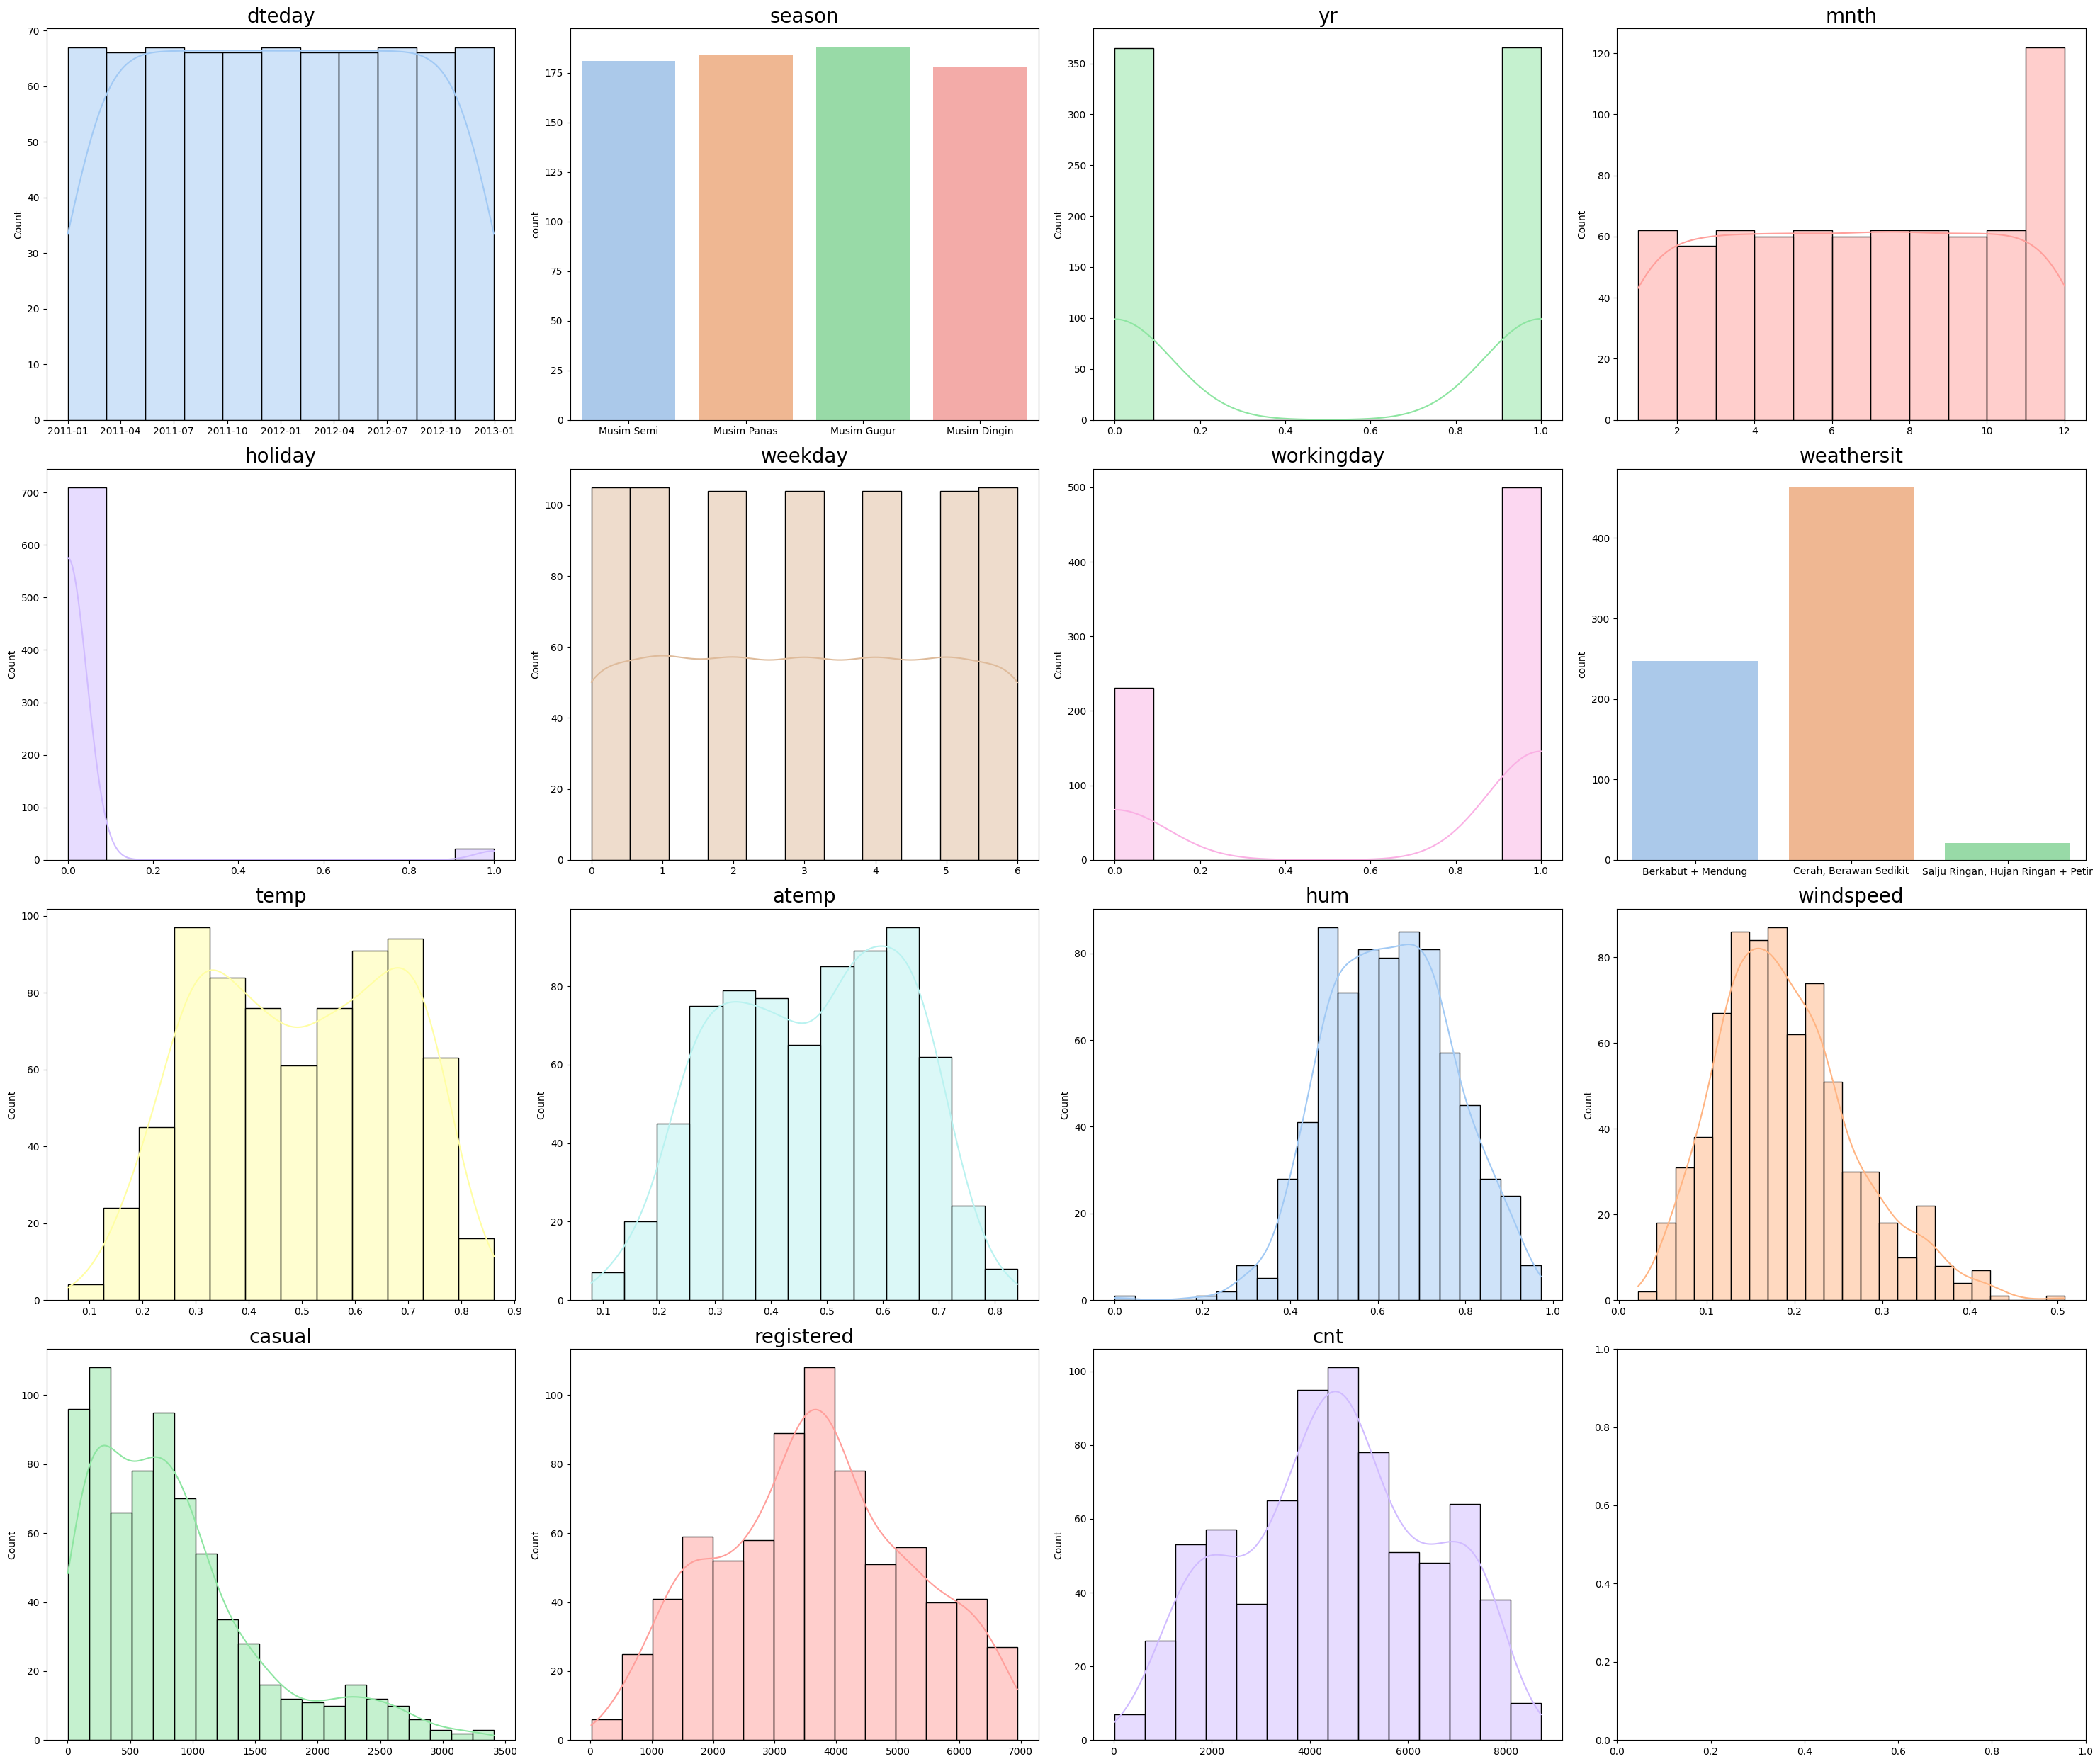

In [51]:
# Plotting distribusi data setiap kolom
fig, ax = plt.subplots(4, 4)  # Update jumlah subplots sesuai dengan jumlah kolom
fig.set_size_inches(30, 25)   # Ukuran plot

# Memisahkan fitur numerik dan kategorikal
numerical_features = clean_df.select_dtypes(include=['int64', 'float64','datetime64[ns]']).columns
categorical_features = clean_df.select_dtypes(include=['object', 'datetime64[ns]']).columns

# Set palet warna pastel dari seaborn
pastel_palette = sns.color_palette("pastel")

# Loop untuk plotting
for i, feature in enumerate(clean_df.columns):
    row = i // 4
    col = i % 4
    if feature in numerical_features:
        hist = sns.histplot(data=clean_df, x=feature, ax=ax[row, col], kde=True, color=pastel_palette[i % len(pastel_palette)])
    elif feature in categorical_features:
        hist = sns.countplot(data=clean_df, x=feature, ax=ax[row, col], palette=pastel_palette)

    hist.set_title(feature, fontsize=20)
    hist.set_xlabel('')  # Menghapus label x-axis untuk kebersihan visual

# Adjust layout untuk mencegah overlap
plt.tight_layout()
plt.show()


insight:
1. Distribusi penyewaan untuk pengguna casual menunjukkan pola skewed ke kiri (positive skewness), di mana mayoritas pengguna casual menyewa sepeda dalam jumlah yang lebih kecil. 
2. Distribusi penyewaan untuk pengguna registered memiliki pola yang lebih mendekati distribusi normal
1. Pengguna Casual vs Registered: Jumlah penyewaan untuk pengguna terdaftar (registered) cenderung lebih tinggi dan terdistribusi lebih merata dibandingkan dengan pengguna tidak terdaftar (casual). Hal ini bisa mengindikasikan bahwa pengguna terdaftar menggunakan sepeda secara lebih rutin dan konsisten, sementara pengguna casual mungkin hanya menyewa sepeda sesekali, dengan intensitas penyewaan yang lebih rendah.

kesimpulan awal :

1. Pengguna Registered Mendominasi dan berkontribusi lebih besar terhadap penyewaan sepeda secara keseluruhan, yang mungkin bisa dikaitkan dengan loyalitas atau penggunaan rutin untuk keperluan sehari-hari.
2. Pengguna Casual Lebih Fleksibel atau lebih jarang menyewa sepeda dalam jumlah besar, yang menunjukkan kemungkinan penggunaan yang lebih musiman.

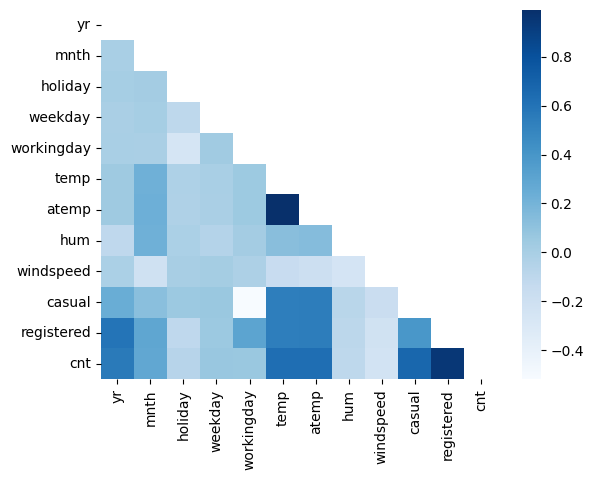

In [60]:
df_num_corr = clean_df.select_dtypes(exclude=['object', 'datetime64'])
sns.heatmap(df_num_corr.corr(), cmap=sns.color_palette("Blues", as_cmap=True),
            annot=False,mask=np.triu(np.ones_like(df_num.corr(), dtype=bool)))

plt.show()

Perhatikan bahwa:

Casual, registered, dan count sangat berkorelasi positif terhadap temp dan atemp. Hal ini menunjukkan bahwa jika semakin suhu menghangat, maka jumlah pengguna, pelanggan casual dan terdaftar juga meningkat. Hal ini dapat menjadi penguat kesimpulan bahwa pelanggan prefer beraktivitas lebih banyak saat suhu hangat

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana variasi pola penggunaan sepeda berdasarkan musim tahun 2011-2012?

Untuk menjawab pertanyaan ini, analisis akan menggunakan visualisasi data, korelasi, dan agregasi data sederhana untuk melihat pola penggunaan sepeda di setiap musim.

Langkah-langkah yang akan dilakukan:

1. Membuat plot untuk melihat distribusi jumlah penyewaan sepeda pada setiap musim (spring, summer, fall, dan winter).
Agregasi Data Penyewaan Per Musim:
3. Menghitung total dan rata-rata penyewaan sepeda untuk setiap musim guna melihat pola penggunaan sepeda di tiap musim.
Perbandingan Tahun 2011 dan 2012:
4. Membandingkan pola penyewaan sepeda pada tahun 2011 dan 2012 untuk melihat apakah ada perbedaan signifikan pada pola penggunaan di kedua tahun tersebut.

C:\Users\HANIF ANANDA\AppData\Local\Temp\ipykernel_32972\3820400043.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=clean_df, palette="pastel")


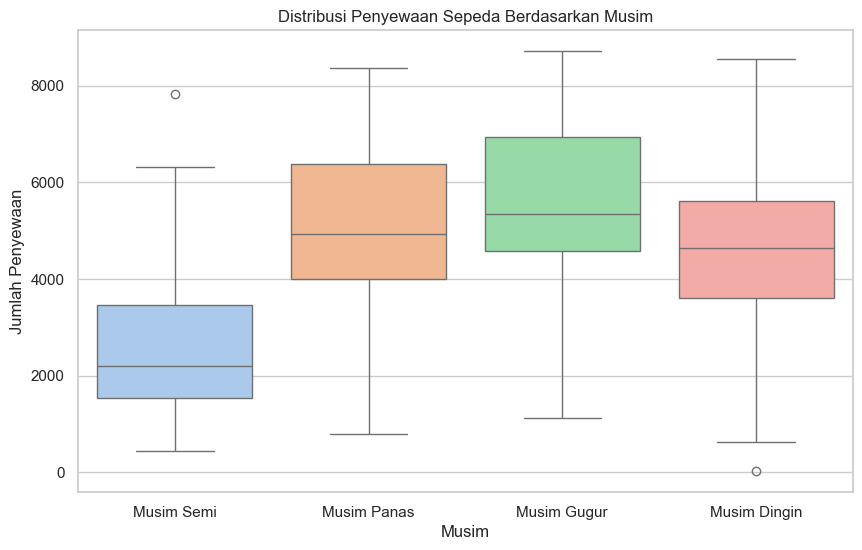

In [62]:
# Set style untuk seaborn
sns.set(style="whitegrid")

# Visualisasi distribusi penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='cnt', data=clean_df, palette="pastel")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()

insight :
1. Penyewaan Tertinggi di Musim Panas dan Musim Gugur. Hal ini mengindikasikan bahwa pengguna lebih aktif menggunakan sepeda pada musim-musim ini, yang mungkin disebabkan oleh cuaca yang lebih nyaman untuk bersepeda.
2. Musim Semi memiliki jumlah penyewaan yang paling rendah. Hal ini terlihat dari nilai median yang lebih rendah dibandingkan dengan musim lainnya. Hal tersebut diduga karena cuaca yang lebih dingin dan tidak stabil pada musim semi yang memengaruhi keputusan orang untuk menggunakan sepeda.
3. Meskipun Musim Dingin berikaitan dengan kondisi yang kurang nyaman untuk bersepeda, jumlah penyewaan masih cukup signifikan, dengan median yang berada di atas musim semi. Hal ini menunjukkan masih ada kelompok orang yang masih menggunakan layanan sepeda meski cuaca yang harsh, dugaan awal adalah kelompok 'registered'

,season,sum,mean
3,Musim Semi,471348,2604.132597
0,Musim Dingin,841613,4728.162921
2,Musim Panas,918589,4992.331522
1,Musim Gugur,1061129,5644.303191


C:\Users\HANIF ANANDA\AppData\Local\Temp\ipykernel_32972\1242889703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='sum', data=season_aggregation, palette="pastel", ax=ax[0])
C:\Users\HANIF ANANDA\AppData\Local\Temp\ipykernel_32972\1242889703.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='mean', data=season_aggregation, palette="pastel", ax=ax[1])


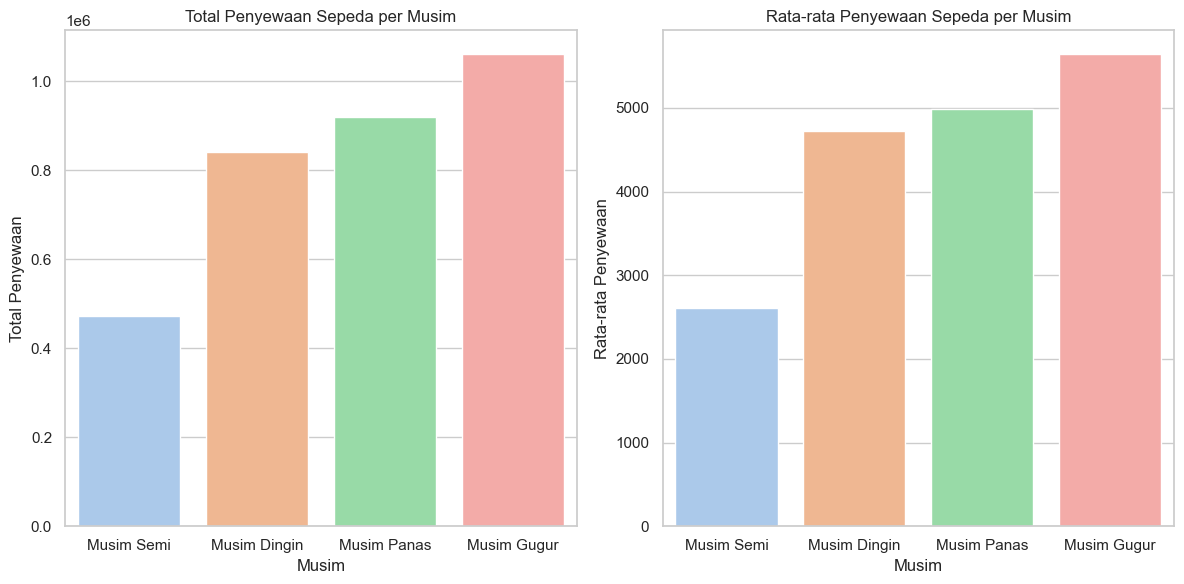

In [68]:
# Menghitung total dan rata-rata penyewaan sepeda per musim
season_aggregation = clean_df.groupby('season')['cnt'].agg(['sum', 'mean']).reset_index().sort_values(by='sum')
display(season_aggregation)
# Visualisasi agregasi total dan rata-rata penyewaan sepeda per musim
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Barplot untuk total penyewaan per musim
sns.barplot(x='season', y='sum', data=season_aggregation, palette="pastel", ax=ax[0])
ax[0].set_title('Total Penyewaan Sepeda per Musim')
ax[0].set_xlabel('Musim')
ax[0].set_ylabel('Total Penyewaan')

# Barplot untuk rata-rata penyewaan per musim
sns.barplot(x='season', y='mean', data=season_aggregation, palette="pastel", ax=ax[1])
ax[1].set_title('Rata-rata Penyewaan Sepeda per Musim')
ax[1].set_xlabel('Musim')
ax[1].set_ylabel('Rata-rata Penyewaan')

plt.tight_layout()
plt.show()


insight:

Musim Gugur memiliki total penyewaan sepeda tertinggi dengan angka 1,061,129 diikuti Musim Panas dengan total penyewaan 918,589, sedangkan Musim Dingin memiliki total penyewaan 841,613. Ini menunjukkan bahwa kedua musim ini juga populer, tetapi tidak sepopuler musim gugur yang mungkin disebabkan oleh cuaca yang nyaman untuk beraktivitas dan pemandangan yang indah.

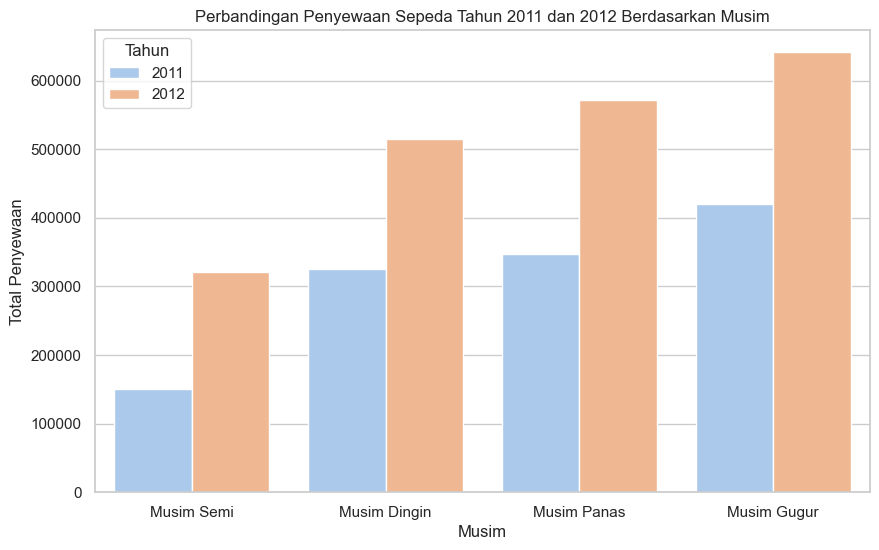

,season,yr,cnt
6,Musim Semi,2011,150000
7,Musim Semi,2012,321348
0,Musim Dingin,2011,326137
4,Musim Panas,2011,347316
2,Musim Gugur,2011,419650
1,Musim Dingin,2012,515476
5,Musim Panas,2012,571273
3,Musim Gugur,2012,641479


In [76]:
# Menghitung total penyewaan sepeda per musim berdasarkan tahun
season_year_agg = clean_df.groupby(['season', 'yr'])['cnt'].sum().reset_index().sort_values(by='cnt')

# Mengganti nilai 0 dan 1 di kolom 'yr' menjadi '2011' dan '2012'
season_year_agg['yr'] = season_year_agg['yr'].map({0: '2011', 1: '2012'})

# Visualisasi perbandingan penyewaan sepeda pada tahun 2011 dan 2012 untuk setiap musim
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='cnt', hue='yr', data=season_year_agg, palette="pastel")
plt.title("Perbandingan Penyewaan Sepeda Tahun 2011 dan 2012 Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan")
plt.legend(title='Tahun')
plt.show()

display(season_year_agg)


insight:

1. Peningkatan total penyewaan sepeda di setiap musim pada tahun 2012 dibandingkan tahun 2011. Hal ini menunjukkan tren positif dalam penggunaan sepeda di tahun 2012.
2. Musim Gugur menunjukkan jumlah penyewaan tertinggi di antara semua musim pada kedua tahun tersebut
3. Kenaikan penggunaan pada musim dingin di tahun 2012 tidak sebesar musim lainnya, hal ini menunjukkan bahwa pelanggan mempertimbangkan banyak faktor untuk beraktivitas.

---

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?




Untuk menjawab pertanyaan ini, analisis akan memanfaatkan visualisasi data, analisis korelasi, dan agregasi data sederhana untuk memahami hubungan antara kondisi cuaca dan jumlah penyewaan sepeda.

Langkah-langkah yang akan dilakukan:
1. Membuat plot untuk menunjukkan distribusi jumlah penyewaan sepeda berdasarkan kategori kondisi cuaca (weathersit). Hal ini bertujuan untuk melihat seberapa besar pengaruh kondisi cuaca terhadap jumlah penyewaan.
Analisis Korelasi:
2. Menghitung koefisien korelasi antara jumlah penyewaan sepeda (cnt) dan variabel cuaca lainnya, seperti suhu (temp dan atemp), kelembapan (hum), dan kecepatan angin (windspeed). Ini akan memberikan gambaran mengenai hubungan linier antara faktor-faktor cuaca dengan jumlah penyewaan.
Agregasi Data Penyewaan Berdasarkan Kondisi Cuaca:
3. Menghitung total dan rata-rata penyewaan sepeda untuk setiap kategori kondisi cuaca. Ini bertujuan untuk memahami pola penggunaan sepeda dalam konteks berbagai kondisi cuaca yang berbeda.

C:\Users\HANIF ANANDA\AppData\Local\Temp\ipykernel_32972\578300221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clean_df, x='weathersit', y='cnt', palette='pastel')


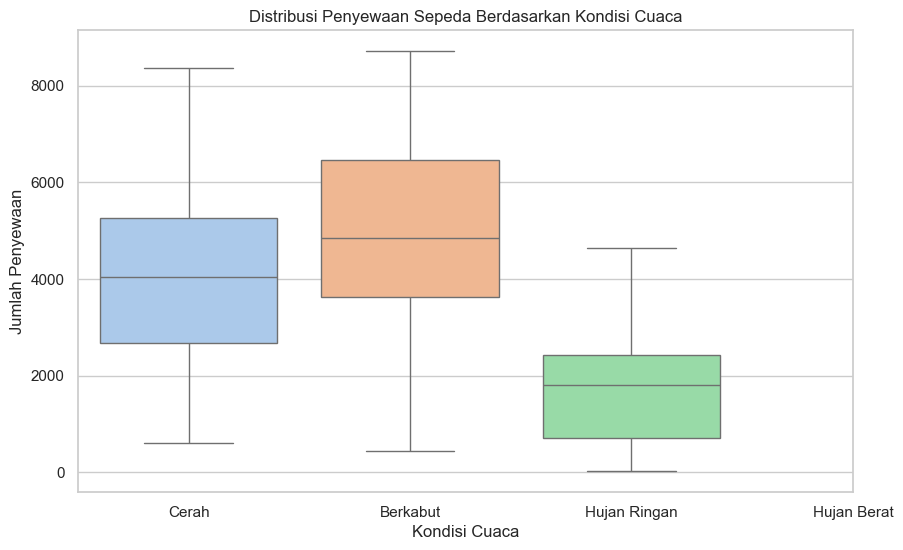

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df, x='weathersit', y='cnt', palette='pastel')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berkabut', 'Hujan Ringan', 'Hujan Berat'])
plt.show()

insight:
1. Penyewaan sepeda tertinggi terjadi pada kondisi berkabut, terlihat dari median yang lebih tinggi. Hal ini menunjukkan bahwa pengguna tetap aktif meskipun cuaca tidak sepenuhnya cerah.
2. Variabilitas jumlah penyewaan pada cuaca cerah dan berkabut menunjukkan lebar yang hampir sama, mengindikasikan adanya hari dengan penyewaan tinggi dan rendah, yang mungkin dipengaruhi oleh faktor lain.
3. Penyewaan sangat rendah saat cuaca hujan ringan dan berat, menunjukkan bahwa pengguna cenderung menghindari bersepeda dalam kondisi hujan, sehingga cuaca ekstrem berdampak signifikan terhadap perilaku penyewaan.

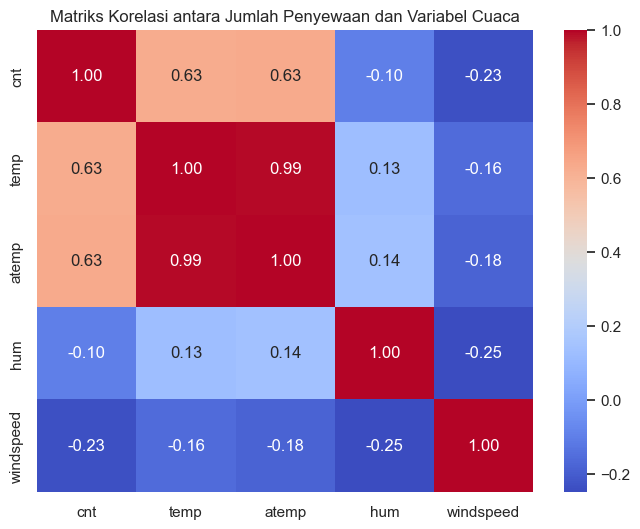

In [78]:
# Menghitung korelasi antara jumlah penyewaan dan variabel cuaca
correlation_df = clean_df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']]
correlation = correlation_df.corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi antara Jumlah Penyewaan dan Variabel Cuaca')
plt.show()

insight:

1. Temp dan atemp berkorelasi positif hampir sempurna.Tmenunjukkan bahwa perubahan suhu udara dan suhu yang dirasakan sangat sejalan, mempengaruhi keputusan pengguna untuk menyewa sepeda.
2. Korelasi positif yang signifikan (> 0.5) antara temp dan jumlah penyewaan (cnt) mengindikasikan bahwa semakin tinggi suhu udara, semakin banyak pelanggan yang melakukan penyewaan sepeda. Hal ini menunjukkan bahwa pengguna lebih cenderung beraktivitas di luar saat cuaca hangat.
3. Terdapat korelasi negatif antara windspeed dengan cnt, hum, dan temp. Hal ini mengindikasikan bahwa meningkatnya kecepatan angin dan kelembapan cenderung mengurangi minat pengguna untuk menyewa sepeda, yang bisa jadi disebabkan oleh ketidaknyamanan saat bersepeda dalam kondisi tersebut, namun hal ini masih dugaan karena koefisien korelasi cukup kecil (-0.2<x<0).

In [86]:
# Menghitung total dan rata-rata penyewaan untuk setiap kondisi cuaca
weathersit_agg = clean_df.groupby('weathersit')['cnt'].agg(['sum', 'mean']).reset_index()
weathersit_agg.columns = ['Kondisi Cuaca', 'Total Penyewaan', 'Rata-rata Penyewaan']
weathersit_agg = weathersit_agg.sort_values(by='Total Penyewaan')

# Menampilkan hasil agregasi
display(weathersit_agg)

,Kondisi Cuaca,Total Penyewaan,Rata-rata Penyewaan
2,"Salju Ringan, Hujan Ringan + Petir",37869,1803.285714
0,Berkabut + Mendung,996858,4035.862348
1,"Cerah, Berawan Sedikit",2257952,4876.786177


insight:

1. Cuaca cerah dan berawan sedikit mencatatkan jumlah penyewaan tertinggi, dengan total mencapai 2.257.952. Hal ini menunjukkan bahwa pengguna lebih cenderung menyewa sepeda pada hari yang cerah.
2. Walaupun cuaca berkabut + mendung masih memberikan jumlah penyewaan yang signifikan (996.858), penyewaan dalam kondisi salju ringan dan hujan ringan + petir sangat rendah (37.869). Ini menunjukkan bahwa pengguna cenderung menghindari bersepeda dalam kondisi cuaca yang kurang mendukung.

---

## Conclusion

1. **Seberapa sering dan seberapa baru pengguna menyewa sepeda dari sistem bike sharing pada tahun 2011-2012?**

Dari pola penggunaan sepeda, dapat dilihat bahwa musim sangat mempengaruhi pola penggunaan sepeda. Jumlah penyewaan tertinggi terjadi pada musim gugur dan musim panas, menunjukkan bahwa pengguna lebih suka menggunakan sepeda di musim dengan suhu yang lebih tinggi. Musim dingin dan musim semi memiliki jumlah penyewaan yang lebih rendah, terutama pada hari-hari ketika cuaca buruk. Hal ini cenderung menggambarkan bahwa suhu dan cuaca adalah faktor-faktor penting dalam keputusan pengguna untuk menyewa sepeda.

2. **Bagaimana karakteristik pengguna kasual dibandingkan dengan pengguna terdaftar dalam hal frekuensi dan waktu penyewaan?**

Analisis ini menyimpulkan bahwa kondisi cuaca adalah salah satu faktor paling signifikan yang mempengaruhi jumlah penyewaan sepeda. Kondisi optimal tercapai saat cuaca cerah atau berawan, yang menghasilkan penyewaan yang sangat tinggi. Sebaliknya, penyewaan mengalami penurunan drastis dalam kondisi hujan ringan atau salju. Hal ini menunjukkan bahwa pengguna cenderung menghindari bersepeda dalam cuaca yang tidak mendukung.
